In [5]:
import os, sys
os.environ['PYTHONHASHSEED']=str(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pickle
import itertools
import time
import itertools
import seaborn as sns
from IPython.display import display, clear_output


%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sys.path.append('../rsc/')
from helper import get_color

In [7]:
esiti_data = pd.read_csv('../data/scpesitinew.csv',
                    low_memory=False)

In [21]:
small_table = esiti_data.iloc[:20].copy()
small_table.index.name = 'id'
small_table.fillna(value='Not a Number')
small_table.to_csv('../data/small.dat', index=True)
pd.read_csv('../data/small.dat')

,id,id_gara,oggetto_della_gara,numero_gara_anac,settore,modalita_realizzazione,importo_gara,num_tot_lotti,rup,cf_rup,...,ribasso_di_aggiudicazione,offerta_in_aumento,imp_di_aggiudicazione,data_aggiudicazione_definitiva,data_pubblicazione_scp,id_gruppo,ruolo,aggiudicatario,cf_aggiudicatario,url_esito
0,0,40607,Affidamento dei servizi di manutenzione evolut...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,92739.00,1,Troccoli Emilia,TRCMLE65S58H703N,...,0.000,NaN,92739.00,"""2016-03-21T23:00:00.000Z""","""2016-05-22T22:00:00.000Z""",NaN,NaN,Gesinf srl,01633591001,https://www.serviziocontrattipubblici.it/SPInA...
1,1,40608,lavori di Ristrutturazione Edilizia Edificio S...,"""0""",Ordinario,Contratto d'appalto,626991.12,1,Marenco Elvio,MRNLVE76R13A145G,...,0.000,NaN,568337.26,"""2016-02-16T23:00:00.000Z""","""2016-05-04T22:00:00.000Z""",NaN,NaN,Impresa Soda Costruzioni S.r.l.,***********,https://www.serviziocontrattipubblici.it/SPInA...
2,2,40609,Servizio di repertimento e collocamento di per...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,250000.00,1,Mannari Leonardo,MNNLRD73D04E625N,...,0.000,NaN,250000.00,"""2016-05-01T22:00:00.000Z""","""2016-05-05T22:00:00.000Z""",NaN,NaN,GI Group Spa,11629770154,https://www.serviziocontrattipubblici.it/SPInA...
3,3,40610,FORNITURA ANNUALE DEL NUOVO FARMACO ?CYRAMZA? ...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,346560.00,1,Cammarata Angelo,cmmngl67b08c933s,...,0.000,NaN,346560.00,"""2015-11-25T23:00:00.000Z""","""2016-05-03T22:00:00.000Z""",NaN,NaN,ELI LILLY ITALIA SPA,00426150488,https://www.serviziocontrattipubblici.it/SPInA...
4,4,40611,"PROCEDURA EX ART. 57, COMMA 2 LETTERA b) D.LG...","""0""",Ordinario,Contratto di concessione di servizi e/o forniture,74400.00,1,Cammarata Angelo,cmmngl67b08c933s,...,0.000,NaN,74400.00,"""2016-04-07T22:00:00.000Z""","""2016-05-10T22:00:00.000Z""",NaN,NaN,B. BRAUN MILANO SPA,00674840152,https://www.serviziocontrattipubblici.it/SPInA...
5,5,40612,fornitura per 12 mesi del farmaco infungibile ...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,3275276.13,1,Cammarata Angelo,cmmngl67b08c933s,...,0.000,NaN,3275276.13,"""2016-04-06T22:00:00.000Z""","""2016-05-04T22:00:00.000Z""",NaN,NaN,Viiv Healthcare srl,03878140239,https://www.serviziocontrattipubblici.it/SPInA...
6,6,40613,fornitura per 12 mesi del farmaco infungibile ...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,1202831.64,1,Cammarata Angelo,cmmngl67b08c933s,...,0.000,NaN,1202831.64,"""2016-04-06T22:00:00.000Z""","""2016-05-04T22:00:00.000Z""",NaN,NaN,JANSSEN CILAG SPA,02707070963,https://www.serviziocontrattipubblici.it/SPInA...
7,7,40614,"PROCEDURA EX ART. 57, COMMI 2 e 3 LETTERA b) D...","""0""",Ordinario,Contratto di concessione di servizi e/o forniture,98901.00,1,Cammarata Angelo,cmmngl67b08c933s,...,0.000,NaN,98901.00,"""2016-04-12T22:00:00.000Z""","""2016-05-23T22:00:00.000Z""",NaN,NaN,B.R.A.H.A.M. ITALIA SRL,01605730096,https://www.serviziocontrattipubblici.it/SPInA...
8,8,40615,Servizio di riparazione e di implementazione d...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,331505.10,1,Gallucci Francesco,GLLFNC76D19F839B,...,0.000,NaN,331505.10,"""2016-04-08T22:00:00.000Z""","""2016-05-11T22:00:00.000Z""",NaN,NaN,IVECO DEFENCE VEHICLES S.p.a.,02854220213,https://www.serviziocontrattipubblici.it/SPInA...
9,9,40616,Servizio di guardiania dell'impianto di dissal...,"""0""",Ordinario,Contratto di concessione di servizi e/o forniture,24000.00,1,Di Salvo Raffaele,DSLRFL71T24G273I,...,52.000,NaN,11894.40,"""2016-05-23T22:00:00.000Z""","""2016-05-23T22:00:00.000Z""",NaN,NaN,NaN,NaN,https://www.serviziocontrattipubblici.it/SPInA...


In [17]:
small_table.aggiudicatario

0                             Gesinf srl
1        Impresa Soda Costruzioni S.r.l.
2                           GI Group Spa
3                   ELI LILLY ITALIA SPA
4                    B. BRAUN MILANO SPA
5                    Viiv Healthcare srl
6                      JANSSEN CILAG SPA
7                B.R.A.H.A.M. ITALIA SRL
8          IVECO DEFENCE VEHICLES S.p.a.
9                                    NaN
10    TECNO SRL COSTRUZIONI GENERALI SRL
11                                   NaN
12                       ECOBUILDING SRL
13                                   NaN
14                     Ital Ambiente srl
15                Costruzioni Guerra Srl
16                        PELLIZZARI SRL
17                    MASCOTTO MARIO SRL
18    COSTRUZIONI GENERALI GIRARDINI SPA
19                  DCB SOLE ASFALTI SRL
Name: aggiudicatario, dtype: object

### Appaltatore

In [10]:
# aggiudicatario, cf_aggiudicatario

In [4]:
esiti_data.columns

Index(['id_gara', 'oggetto_della_gara', 'numero_gara_anac', 'settore',
       'modalita_realizzazione', 'importo_gara', 'num_tot_lotti', 'rup',
       'cf_rup', 'codice_fiscale_stazione_appaltante',
       'codice_istat_stazione_appaltante', 'denominazione_stazione_appaltante',
       'provincia_stazione_appaltante', 'ufficio',
       'la_sa_agisce_per_conto_di_altro_soggetto',
       'soggetto_per_cui_agisce_la_sa', 'id_lotto', 'cig', 'oggetto_lotto',
       'nr_lotto', 'somma_urgenza', 'tipo_appalto', 'tipo_procedura',
       'criterio_aggiudicazione', 'imp_lotto_netto_sicurezza', 'imp_sicurezza',
       'imp_lotto', 'cup', 'cpv', 'categoria_prevalente', 'classifica',
       'luogo_esecuzione_istat', 'luogo_esecuzione_nuts', 'num_ordine',
       'tipo_atto_o_documento', 'data_pubblicazione_esito',
       'ribasso_di_aggiudicazione', 'offerta_in_aumento',
       'imp_di_aggiudicazione', 'data_aggiudicazione_definitiva',
       'data_pubblicazione_scp', 'id_gruppo', 'ruolo', 'aggiudica

## Cleaning

In [5]:
esiti = esiti_data.copy()

esiti['imp_lotto'] = pd.to_numeric(esiti['imp_lotto'], errors='coerce')
esiti = esiti[esiti.imp_lotto < 1e9]
esiti = esiti[esiti.imp_lotto > 0]

esiti = esiti[esiti.importo_gara < 1e9]
esiti = esiti[esiti.importo_gara > 0]

esiti = esiti[esiti.imp_sicurezza < 1e9]
esiti = esiti[esiti.imp_sicurezza > 0]


esiti = esiti[esiti.imp_lotto_netto_sicurezza < 1e9]
esiti = esiti[esiti.imp_lotto_netto_sicurezza > 0]


date_format = '%Y-%m-%dT%H:%M:%S.%f'
def clean_date(x):
    try:
        return x[1:-2]
    except:
        return np.nan

esiti.data_pubblicazione_scp = pd.to_datetime(esiti.data_pubblicazione_scp.apply(clean_date), format=date_format)

esiti.data_aggiudicazione_definitiva = pd.to_datetime(
    esiti.data_aggiudicazione_definitiva.apply(clean_date), format=date_format)

esiti = esiti.dropna(subset=['data_aggiudicazione_definitiva', 'data_pubblicazione_scp'])
esiti['tempi_aggiudicazione'] = (esiti.data_pubblicazione_scp - esiti.data_aggiudicazione_definitiva).dt.total_seconds()/(60*60*24)
print('Dropped {} rows with negative delay'.format((esiti.tempi_aggiudicazione < 0).sum()))
esiti = esiti[esiti.tempi_aggiudicazione > 0]

Dropped 186 rows with negative delay


## New features

In [6]:
esiti['ratio_sicurezza'] = esiti['imp_sicurezza']/esiti['importo_gara']
esiti['log_importo'] = np.log10(esiti.importo_gara)

## Plots

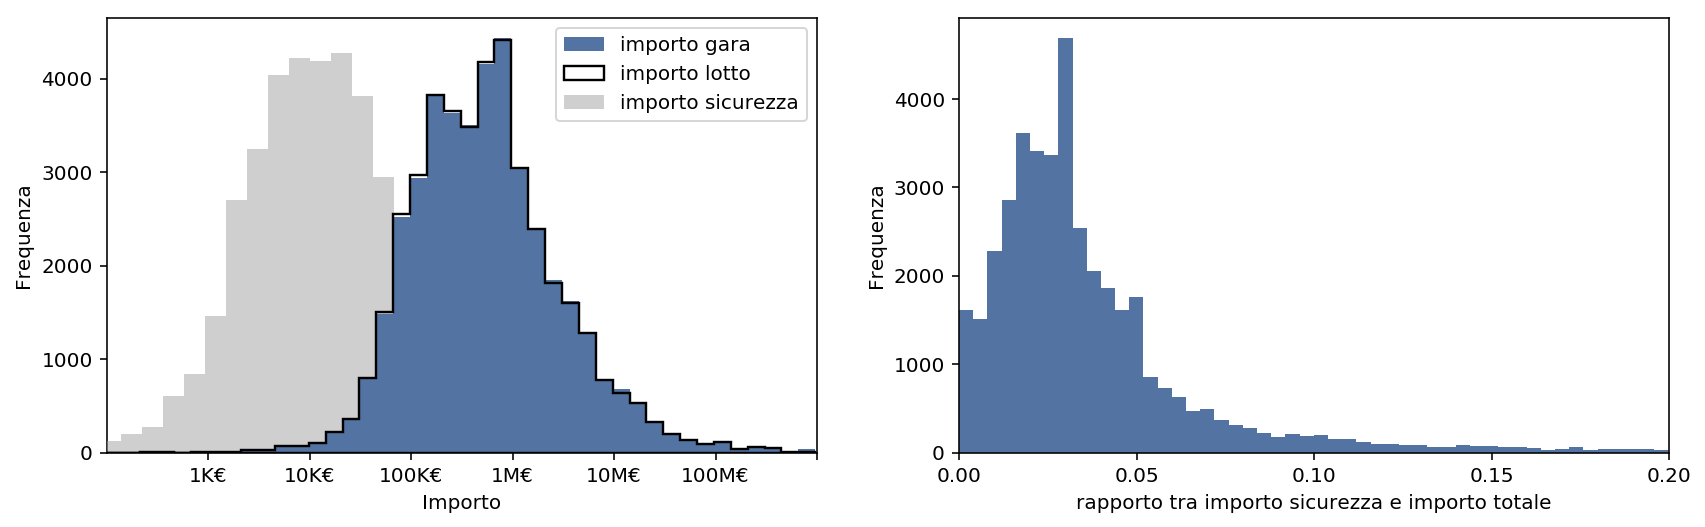

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.hist(np.log10(esiti['importo_gara']), bins=50, label='importo gara', color=get_color(0), zorder=7)
ax1.hist(np.log10(esiti['imp_lotto']), bins=50, histtype='stepfilled', fill=None, label='importo lotto', zorder=9, linewidth=1.2)
ax1.hist(np.log10(esiti['imp_sicurezza']), bins=50, label='importo sicurezza', color=get_color(1), alpha=0.5, zorder=4)

ax1.set_xlim(2, 9)
ax1.set_xticks([3,4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.legend();
ax1.set(**{'xlabel':'Importo', 'ylabel':'Frequenza'})

ax2.hist(esiti.ratio_sicurezza[esiti.ratio_sicurezza<0.2], bins=50, color=get_color(0));
ax2.set(**{'xlabel':'rapporto tra importo sicurezza e importo totale', 'ylabel':'Frequenza', 'xlim':(0,0.2)})
ax2.set_xticks(np.arange(0, 0.21, 0.05));
# fig.savefig('../plots/totale_import_hist.png')

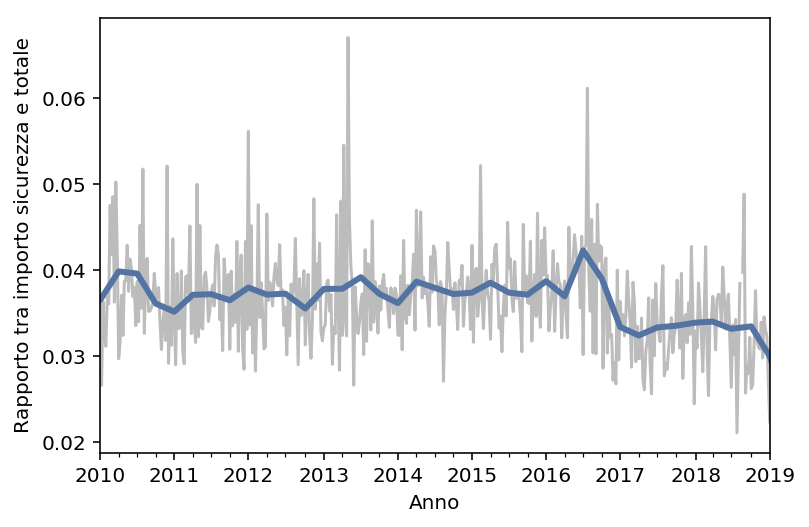

In [302]:
esiti_time = esiti.set_index('data_pubblicazione_scp')

esiti_time = esiti_time[esiti_time.ratio_sicurezza < 0.2]
esiti_time = esiti_time[esiti_time.ratio_sicurezza > 0]


esiti_time_year = esiti_time.resample('AS').mean()
years = esiti_time_year.reset_index().data_pubblicazione_scp.apply(lambda x: x.strftime("%Y"))

esiti_time_m = esiti_time.resample('3M').mean()
esiti_time = esiti_time.resample('W').mean()


fig, ax = plt.subplots(1, figsize=(6, 4))
esiti_time.ratio_sicurezza.plot(ax=ax, color=get_color(1), alpha=0.7)
esiti_time_m.ratio_sicurezza.plot(ax=ax, color=get_color(0), linewidth=3)
ax.set_xlim('01-01-2010', '01-01-2019')

ax.set(**{'xlabel':'Anno', 'ylabel':'Rapporto tra importo sicurezza e totale'});
# fig.savefig('../plots/andamento_percentuale_sicurezza.png')

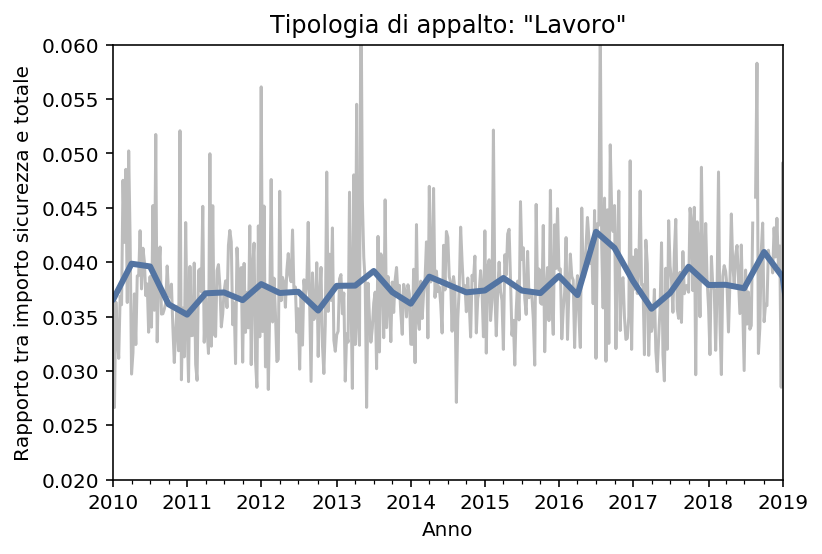

In [303]:
esiti_time = esiti.set_index('data_pubblicazione_scp')

esiti_time = esiti_time[esiti_time.ratio_sicurezza < 0.2]
esiti_time = esiti_time[esiti_time.ratio_sicurezza > 0]
esiti_time = esiti_time[esiti_time.tipo_appalto == 'Lavori']



esiti_time_year = esiti_time.resample('AS').mean()
years = esiti_time_year.reset_index().data_pubblicazione_scp.apply(lambda x: x.strftime("%Y"))

esiti_time_m = esiti_time.resample('3M').mean()
esiti_time = esiti_time.resample('W').mean()


fig, ax = plt.subplots(1, figsize=(6, 4))
esiti_time.ratio_sicurezza.plot(ax=ax, color=get_color(1), alpha=0.7)
esiti_time_m.ratio_sicurezza.plot(ax=ax, color=get_color(0), linewidth=3)
ax.set_xlim('01-01-2010', '01-01-2019')
ax.set_ylim(0.02, 0.06)
ax.set(**{'xlabel':'Anno', 'ylabel':'Rapporto tra importo sicurezza e totale'});
ax.set_title('Tipologia di appalto: "Lavoro"')
fig.savefig('../plots/andamento_percentuale_sicurezza_lavori.png')

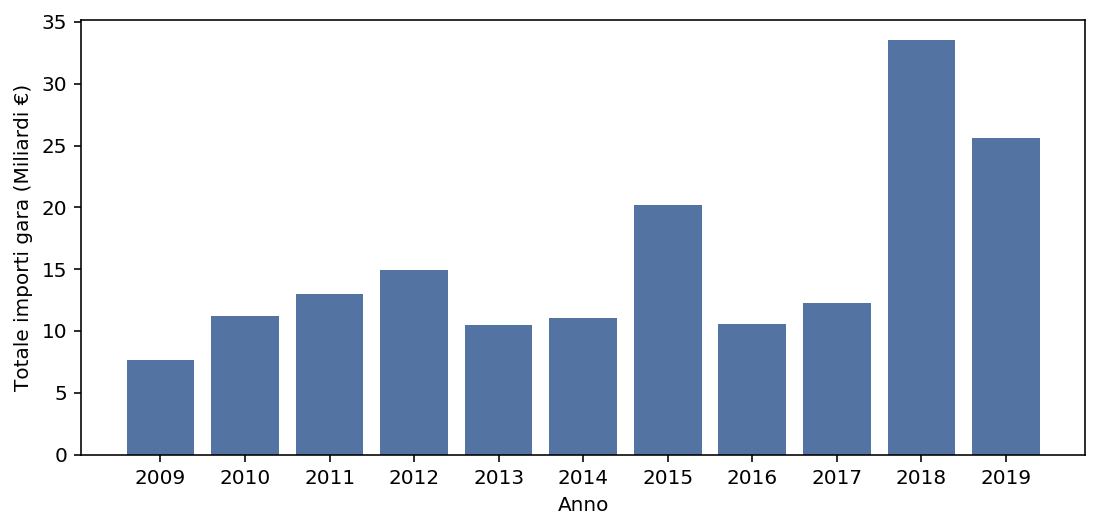

In [304]:
esiti_time = esiti.set_index('data_pubblicazione_scp')
esiti_time_year = esiti_time.resample('AS').sum()
years = esiti_time_year.reset_index().data_pubblicazione_scp.apply(lambda x: x.strftime("%Y"))


fig, ax = plt.subplots(1, figsize=(9, 4))
ax.bar(years, esiti_time_year.importo_gara/1e9, color=get_color(0))
ax.set(**{'xlabel':'Anno', 'ylabel':'Totale importi gara (Miliardi €)'});

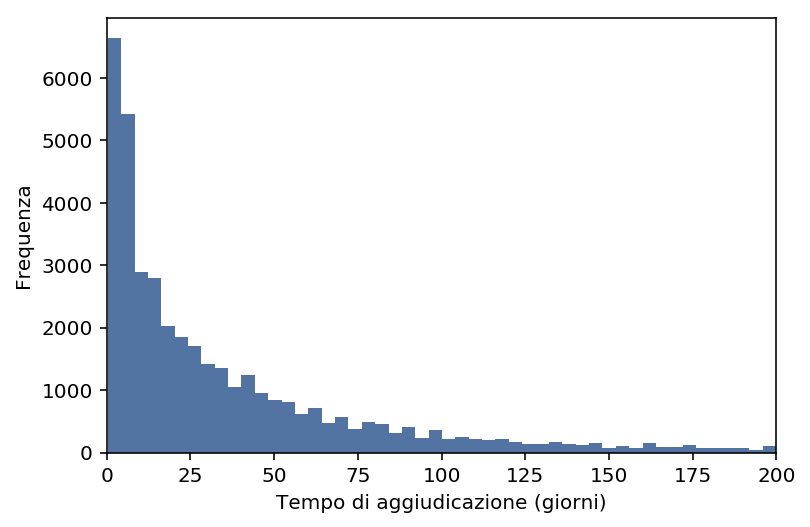

In [305]:
fig, ax = plt.subplots()
esiti['tempi_aggiudicazione'][esiti.tempi_aggiudicazione<200].plot(kind='hist', bins=50, ax=ax, color=get_color(0))
ax.set(**{'xlabel':'Tempo di aggiudicazione (giorni)', 'ylabel':'Frequenza', 'xlim':(0,200)});

[Text(0, 0.5, 'Tipo di appalto'), Text(0.5, 0, 'Importo')]

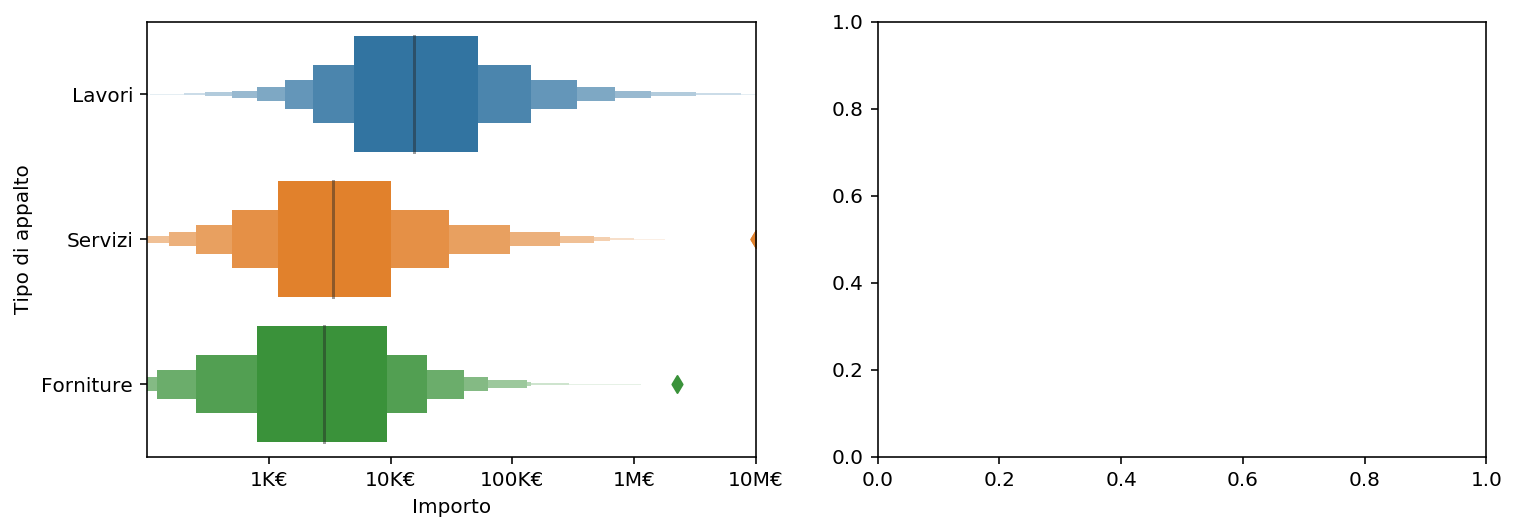

In [306]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')



esiti_mod = esiti.dropna(subset=['tipo_appalto'])
esiti_mod['log_sicurezza'] = np.log10(esiti_mod.imp_sicurezza)
sns.boxenplot(x="log_sicurezza", y="tipo_appalto", data=esiti_mod, ax=ax1)
ax1.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 7)
ax1.set(**{'xlabel':'Importo', 'ylabel':'Tipo di appalto'})



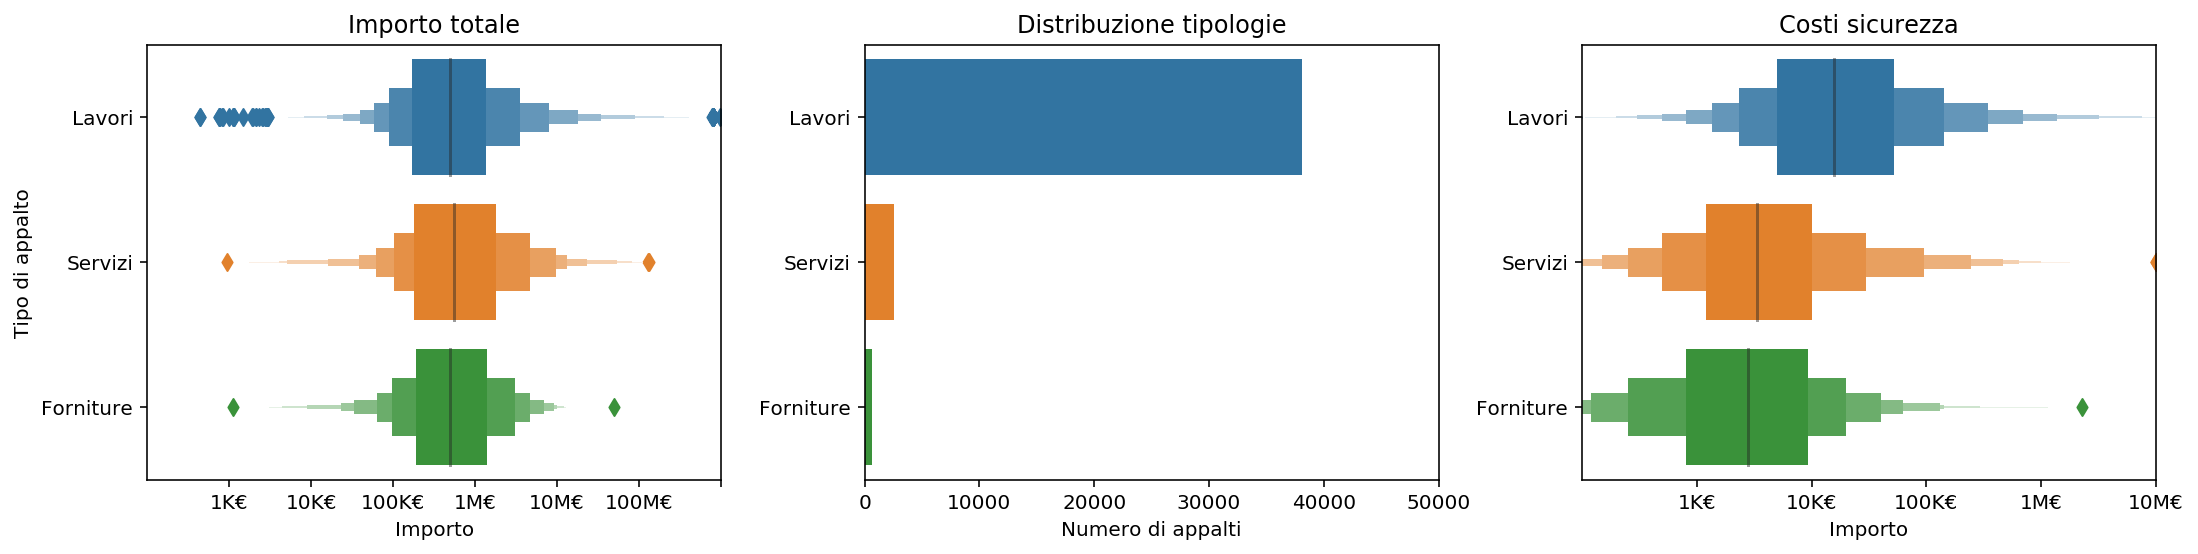

In [307]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


esiti_mod = esiti.dropna(subset=['tipo_appalto'])
sns.boxenplot(x="log_importo", y="tipo_appalto", data=esiti_mod, ax=ax1)
ax1.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 9)
ax1.set(**{'xlabel':'Importo', 'ylabel':'Tipo di appalto', 'title':'Importo totale'})


sns.countplot(y='tipo_appalto', data=esiti_mod, ax=ax2)
ax2.set_xlim(0, 50000)
ax2.set(**{'xlabel':'Numero di appalti', 'ylabel':None, 'title':'Distribuzione tipologie'})

esiti_mod = esiti.dropna(subset=['tipo_appalto'])
esiti_mod['log_sicurezza'] = np.log10(esiti_mod.imp_sicurezza)
sns.boxenplot(x="log_sicurezza", y="tipo_appalto", data=esiti_mod, ax=ax3)
ax3.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax3.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax3.set_xlim(2, 7)
ax3.set(**{'xlabel':'Importo', 'ylabel':None, 'title':'Costi sicurezza'})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
fig.savefig('../plots/tipo_appalto.png')

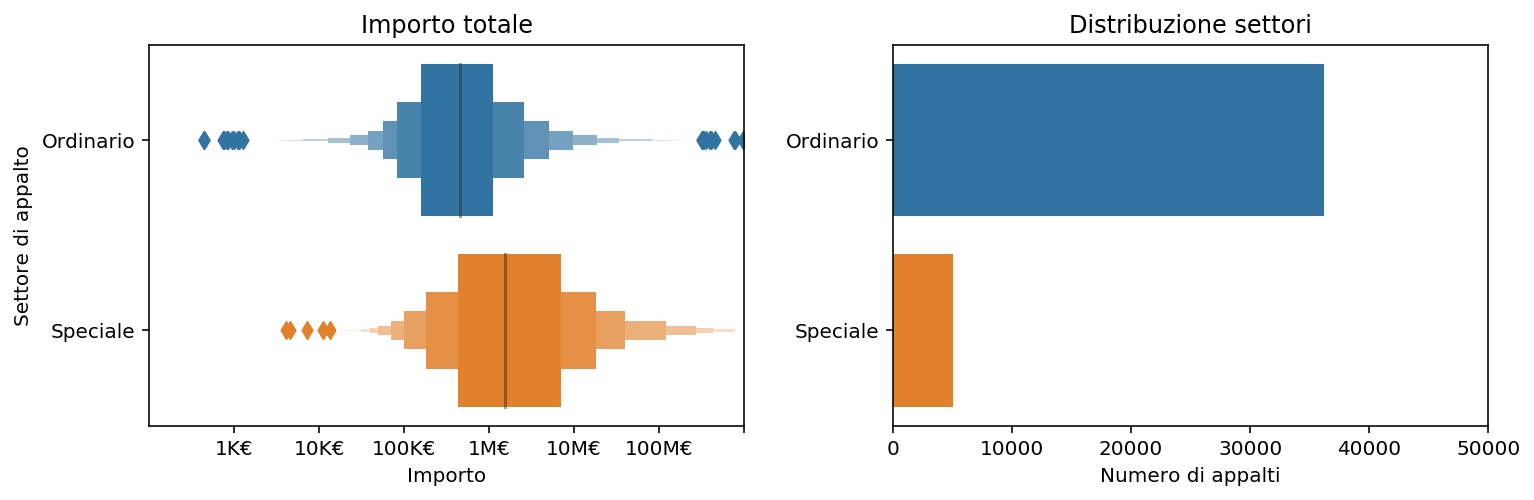

In [308]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

esiti_mod = esiti.dropna(subset=['settore'])
sns.boxenplot(x="log_importo", y="settore", data=esiti_mod, ax=ax1)
ax1.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 9)
ax1.set(**{'xlabel':'Importo', 'ylabel':'Settore di appalto', 'title':'Importo totale'})

sns.countplot(y='settore', data=esiti_mod, ax=ax2)
ax2.set_xlim(0, 50000)
ax2.set(**{'xlabel':'Numero di appalti', 'ylabel':None, 'title':'Distribuzione settori'})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
fig.savefig('../plots/settore_appalto.png')

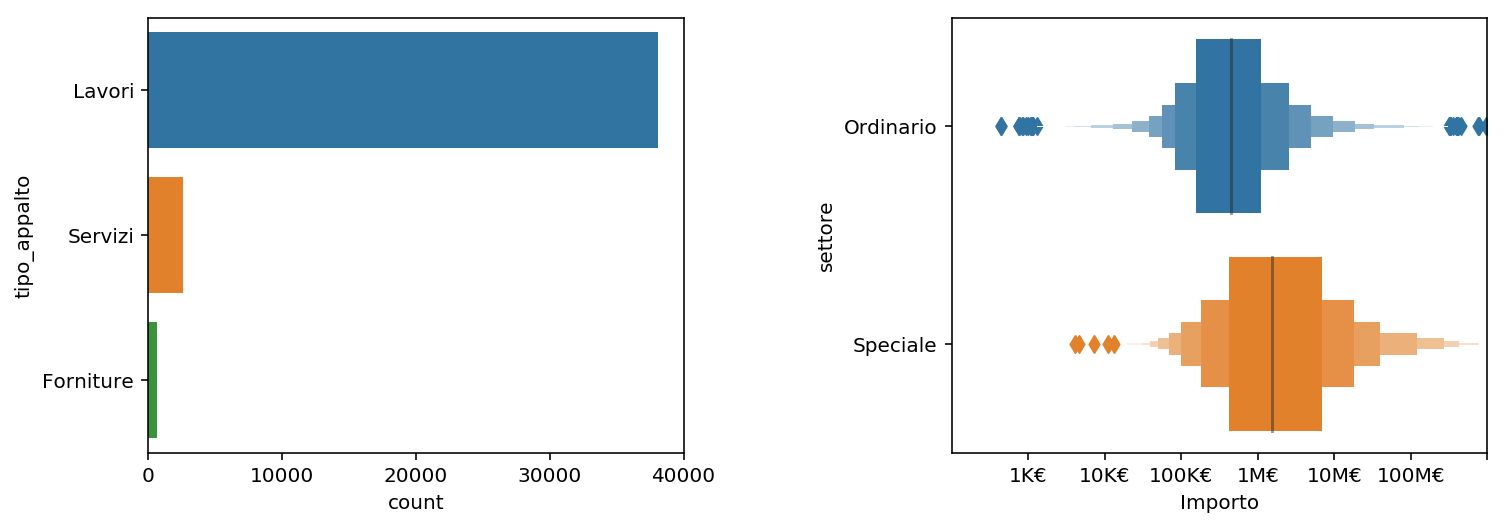

In [309]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')



esiti_mod = esiti.dropna(subset=['tipo_appalto'])

tipo_appalto = esiti_mod.groupby('tipo_appalto').count()
sns.countplot(y='tipo_appalto', data=esiti_mod, ax=ax1)

esiti_mod = esiti.dropna(subset=['settore'])
sns.boxenplot(x="log_importo", y="settore", data=esiti_mod, ax=ax2)
ax2.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax2.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax2.set_xlim(2, 9)
ax2.set(**{'xlabel':'Importo', 'ylabel':'settore'})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

fig.savefig('../plots/tipo_e_settore.png')

(2, 9)

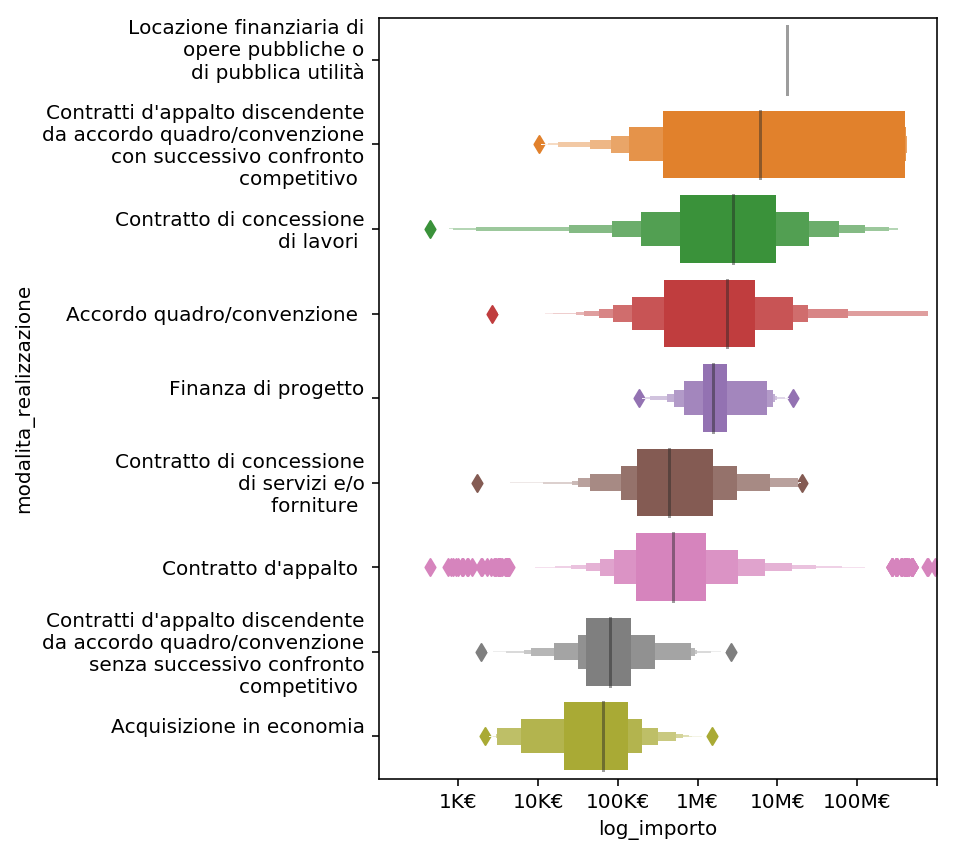

In [310]:
fig, ax1 = plt.subplots(1, figsize=(5, 7))

esiti_mod = esiti.dropna(subset=['modalita_realizzazione']).copy()

def format_return(string):
    return_string = ''
    for index, s in enumerate(string.split(' ')):
        return_string = return_string + s
        return_string = return_string + (' ' if (index+1)%3 else '\n')
    return return_string

esiti_mod.modalita_realizzazione = esiti_mod.modalita_realizzazione.apply(format_return)
sorted_index = (esiti_mod
                .groupby('modalita_realizzazione')
                .mean()[['log_importo']].sort_values('log_importo', ascending=False).index)

sns.boxenplot(x="log_importo", y="modalita_realizzazione", data=esiti_mod, ax=ax1, order=sorted_index)
ax1.set_xticks([3,4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 9)

(2, 9)

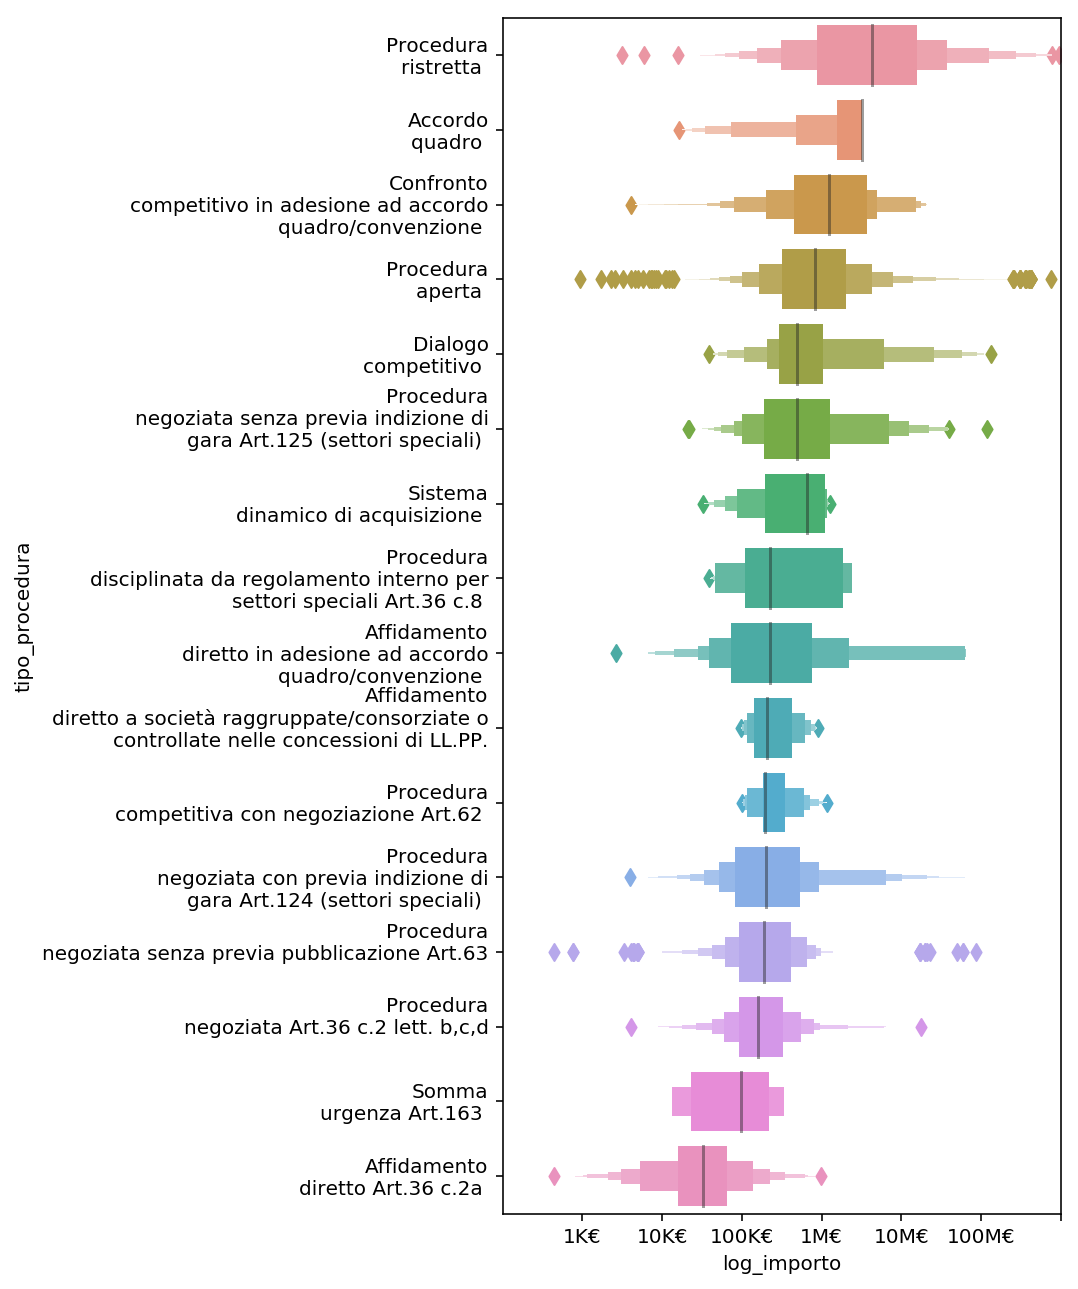

In [311]:
fig, ax1 = plt.subplots(1, figsize=(5, 11))

def format_return(string):
    return_string = ''
    for index, s in enumerate(string.split(' ')):
        return_string = return_string + s
        return_string = return_string + (' ' if index%5 else '\n')
    return return_string

esiti_mod = esiti.dropna(subset=['tipo_procedura']).copy()
esiti_mod.tipo_procedura = esiti_mod.tipo_procedura.apply(format_return)
sorted_index = (esiti_mod
                .groupby('tipo_procedura')
                .mean()[['log_importo']].sort_values('log_importo', ascending=False).index)

sns.boxenplot(x="log_importo", y="tipo_procedura", data=esiti_mod, ax=ax1, order=sorted_index)
ax1.set_xticks([3,4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 9)

(2, 9)

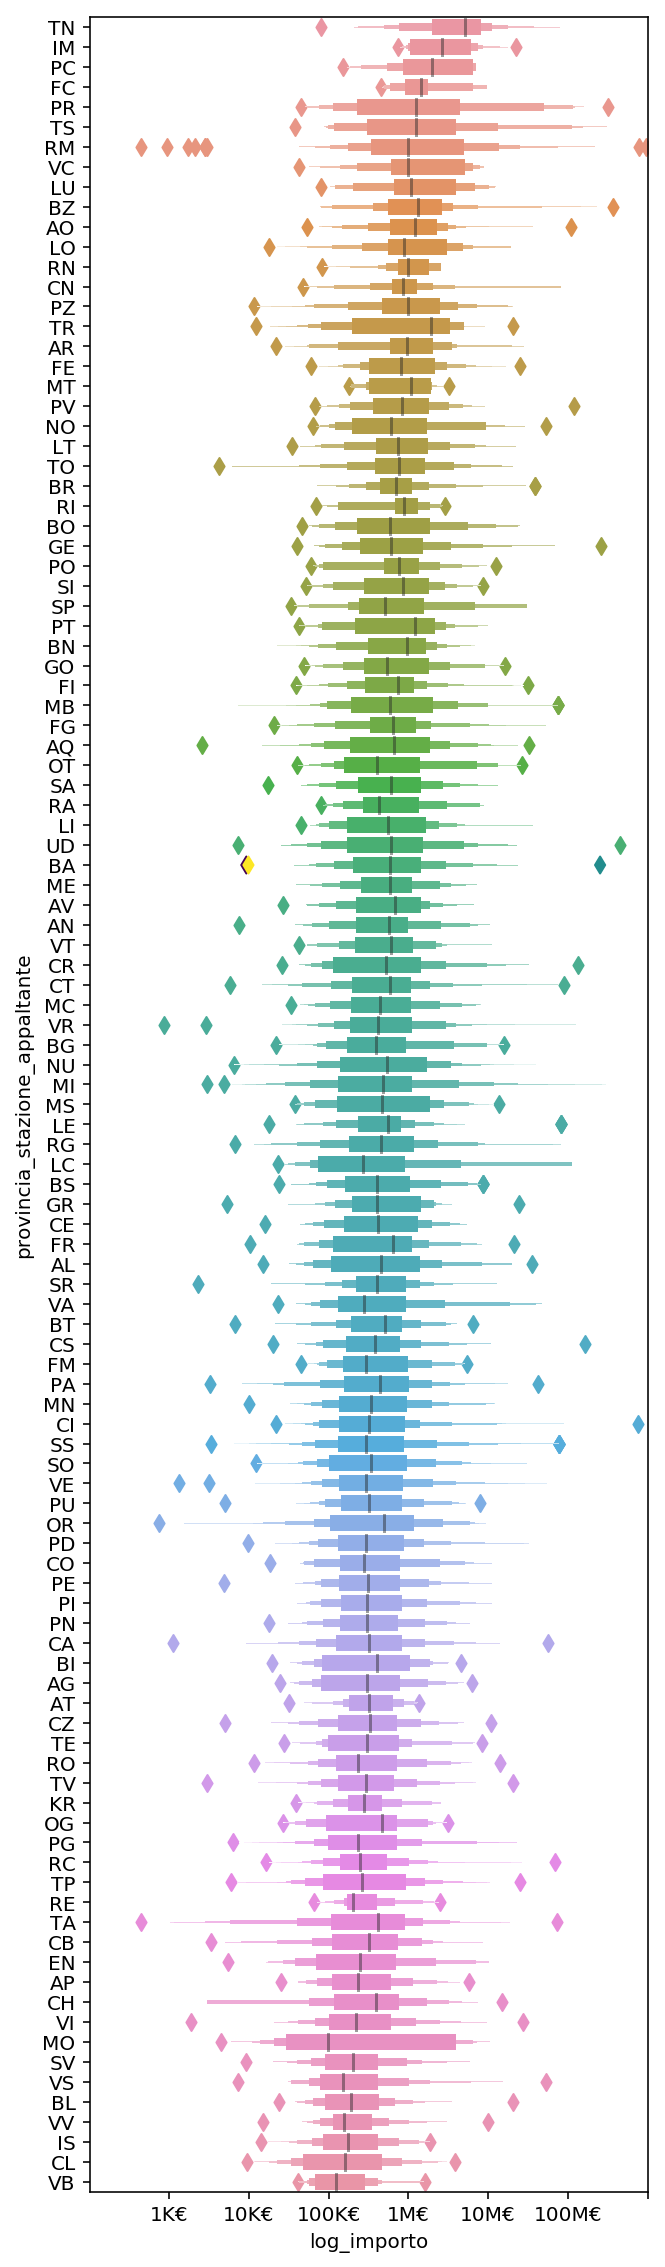

In [312]:
fig, ax1 = plt.subplots(1, figsize=(5, 20))

esiti_mod = esiti.dropna(subset=['provincia_stazione_appaltante']).copy()

sorted_index = esiti_mod.groupby('provincia_stazione_appaltante').mean()[['log_importo']].sort_values('log_importo', ascending=False).index

sns.boxenplot(x="log_importo", y="provincia_stazione_appaltante", data=esiti_mod, ax=ax1, orient='h', order=sorted_index)
ax1.set_xticks([3,4, 5, 6, 7, 8, 9])
ax1.set_xticklabels(['1K€', '10K€', '100K€', '1M€', '10M€', '100M€']);
ax1.set_xlim(2, 9)

In [313]:
import geopandas as gpd

# from https://www.istat.it/it/archivio/124086
df_regioni = gpd.read_file(filename='../data/prov_geo/CMProv2016_ED50_g.shp')
df_regioni = df_regioni.set_index('SIGLA')

C:\Users\aamico\AppData\Local\Continuum\anaconda3\envs\deep_mouse\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


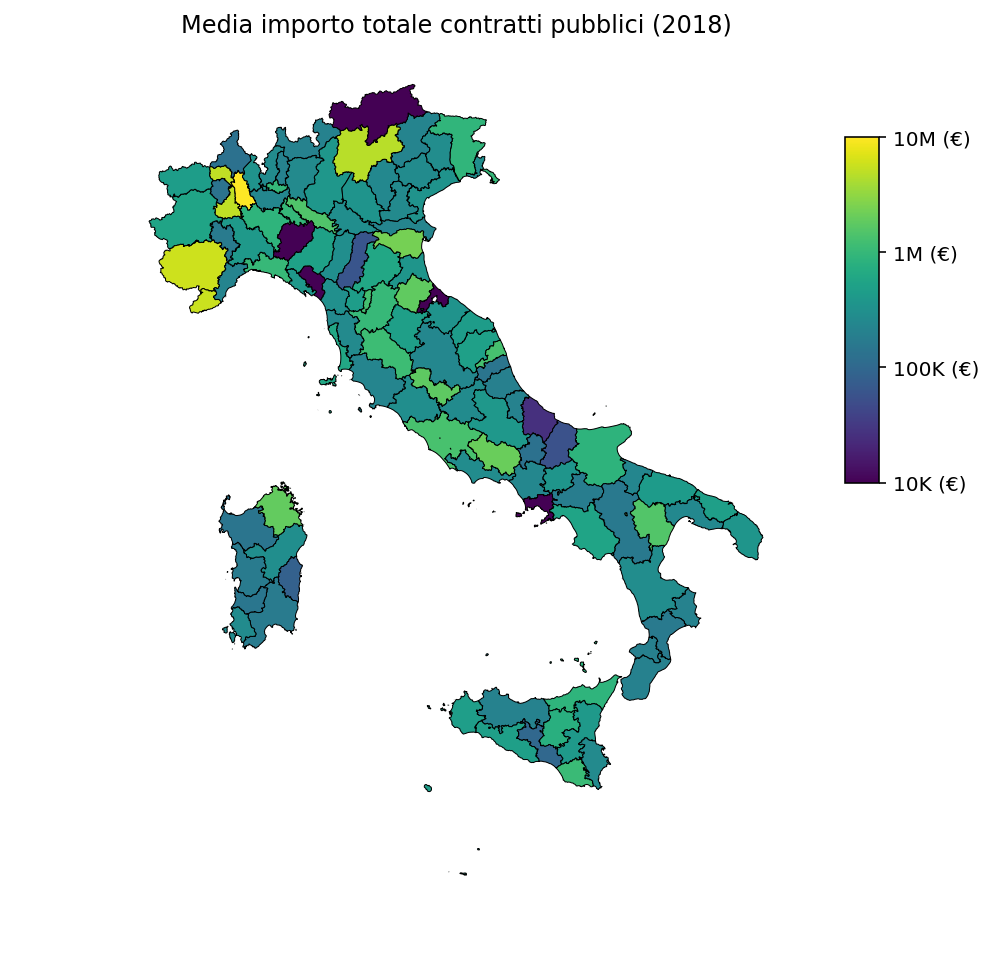

In [314]:

esiti_mod = esiti[esiti.data_pubblicazione_scp > '2018-01-01'].copy()
esiti_mod = esiti_mod[esiti_mod.data_pubblicazione_scp < '2019-01-01']

esiti_mod = esiti_mod.dropna(subset=['provincia_stazione_appaltante']).copy()
esiti_mod = esiti_mod.groupby('provincia_stazione_appaltante').mean()

df = df_regioni.join(esiti_mod)

vmin = 4 # df.log_importo.min()
vmax = 7 # df.log_importo.max()

fig, ax = plt.subplots(figsize=(8,8))
ax = df.plot(column='log_importo',  edgecolor='black', legend=False, ax=ax, vmin=vmin, vmax=vmax, linewidth=0.5)

ax.set_axis_off()
cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)

cb.set_ticks(np.arange(4, 8))
cb.set_ticklabels(['10K (€)', '100K (€)', '1M (€)', '10M (€)']);

ax.set_title('Media importo totale contratti pubblici (2018)');
fig.savefig('../plots/media_2018_geo.png')

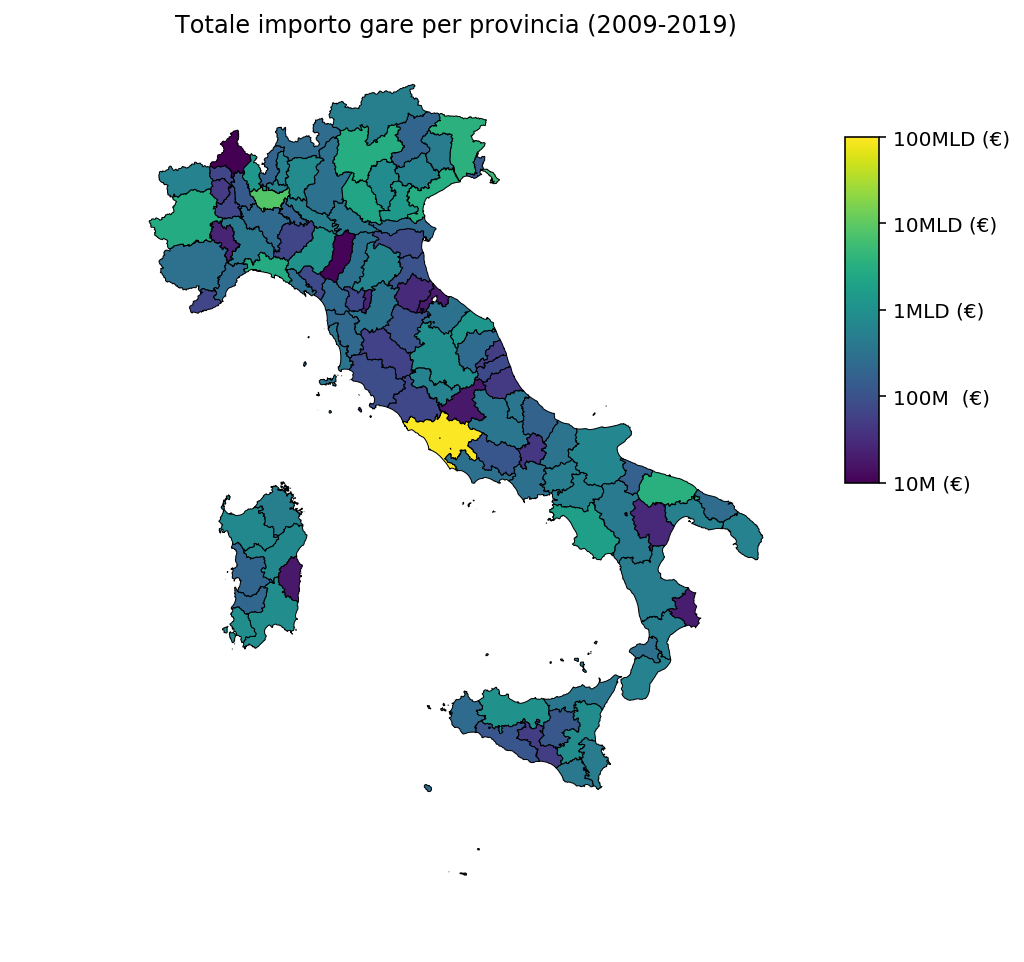

In [315]:
esiti_mod = esiti.dropna(subset=['provincia_stazione_appaltante']).copy()
esiti_mod = esiti_mod.groupby('provincia_stazione_appaltante').sum()

df = df_regioni.join(esiti_mod)


fig, ax = plt.subplots(figsize=(8,8))

df = df.dropna(subset=['importo_gara'])
df['log_totale'] = np.log10(df.importo_gara)
vmin = 7 #df.log_totale.min()
vmax = 11 #df.log_totale.max()


ax = df.plot(column='log_totale',  edgecolor='black', legend=False, ax=ax, vmin=vmin, vmax=vmax, linewidth=0.5)

ax.set_axis_off()
cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)

cb.set_ticks(np.arange(7, 12))
cb.set_ticklabels(['10M (€)','100M  (€)', '1MLD (€)', '10MLD (€)', '100MLD (€)']);
ax.set_title('Totale importo gare per provincia (2009-2019)');

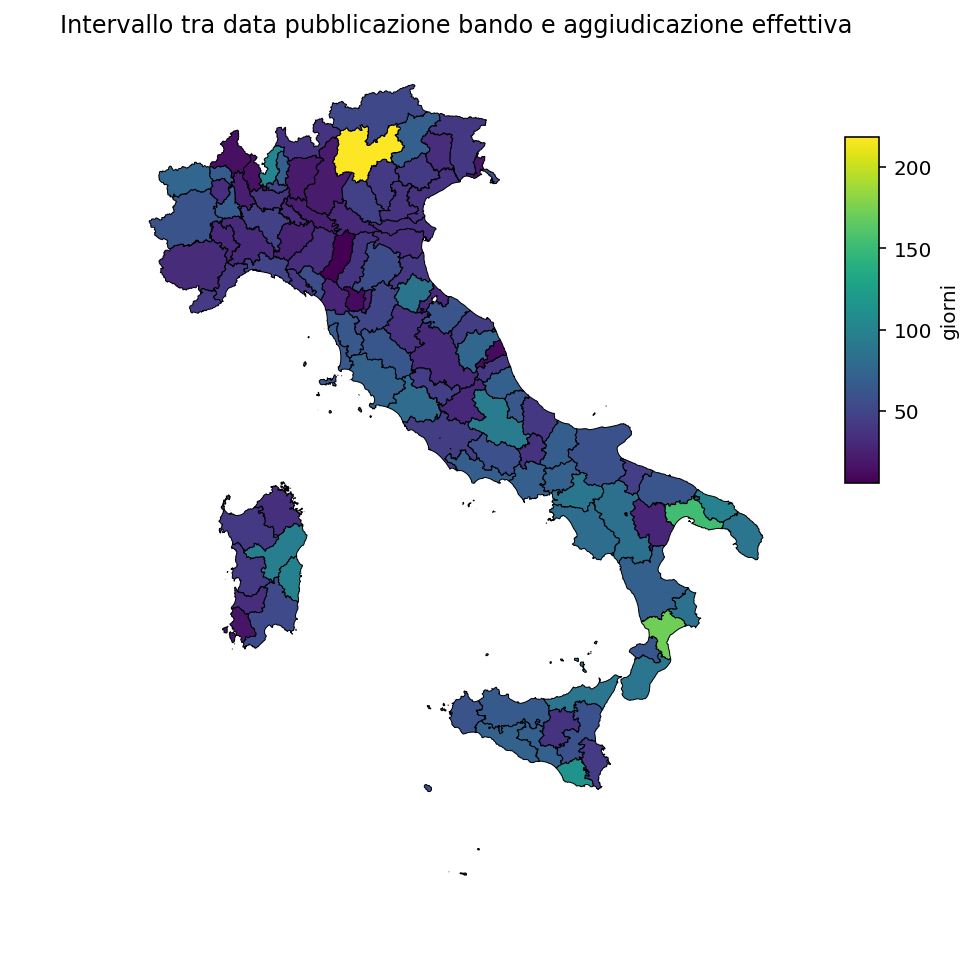

In [316]:
esiti_mod = esiti.dropna(subset=['provincia_stazione_appaltante']).copy()
esiti_mod = esiti_mod.groupby('provincia_stazione_appaltante').mean()

df = df_regioni.join(esiti_mod)

fig, ax = plt.subplots(figsize=(8,8))

df = df.dropna(subset=['tempi_aggiudicazione'])

vmin = df.tempi_aggiudicazione.min()
vmax = df.tempi_aggiudicazione.max()


ax = df.plot(column='tempi_aggiudicazione',  edgecolor='black', legend=False, ax=ax, vmin=vmin, vmax=vmax, linewidth=0.5)

ax.set_axis_off()
cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
cb.set_label('giorni')
ax.set_title('Intervallo tra data pubblicazione bando e aggiudicazione effettiva');

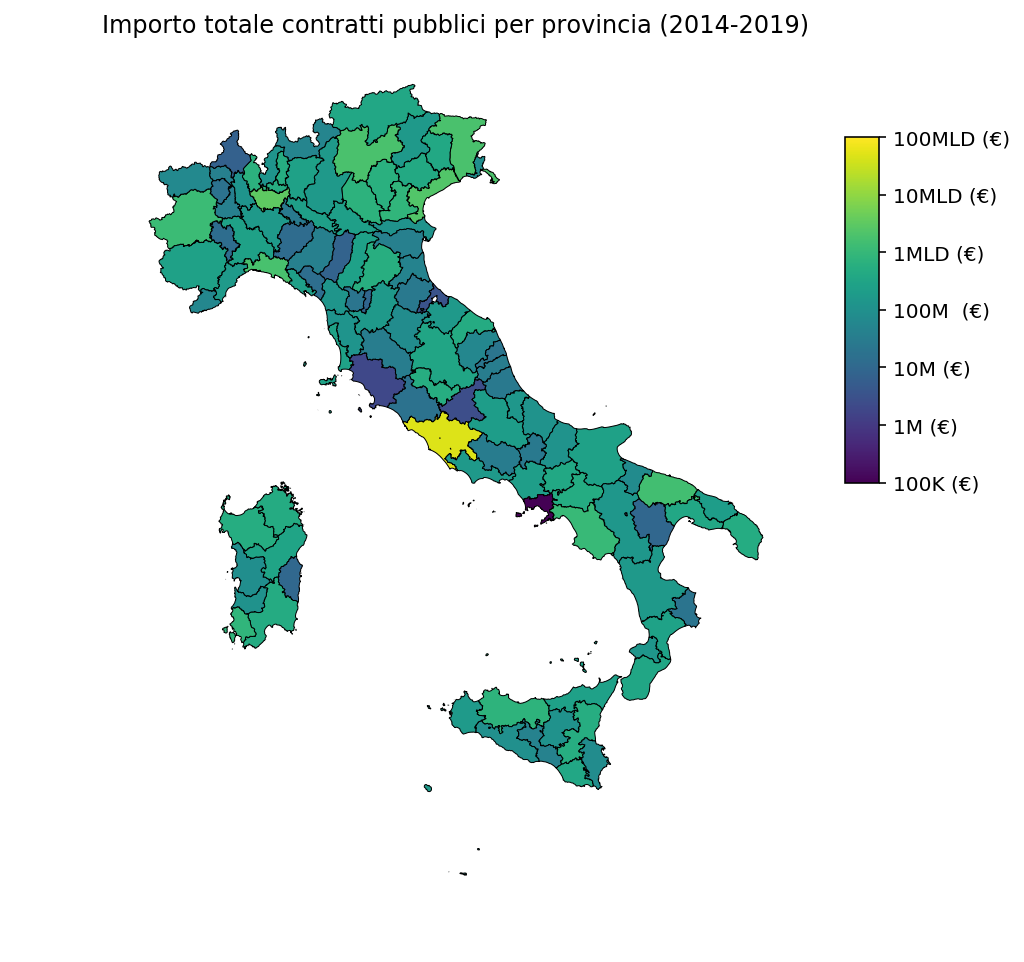

In [317]:

esiti_mod = esiti[esiti.data_pubblicazione_scp > '2014-01-01'].copy()
esiti_mod = esiti_mod[esiti_mod.data_pubblicazione_scp < '2019-01-01']

esiti_mod = esiti_mod.dropna(subset=['provincia_stazione_appaltante']).copy()
esiti_mod = esiti_mod.groupby('provincia_stazione_appaltante').sum()

df = df_regioni.join(esiti_mod)

vmin = 5 # df.log_importo.min()
vmax = 11 # df.log_importo.max()

fig, ax = plt.subplots(figsize=(8, 8))
df['log_sum'] = np.log10(df.importo_gara)
ax = df.plot(column='log_sum',  edgecolor='black', legend=False, ax=ax, vmin=vmin, vmax=vmax, linewidth=0.5)

ax.set_axis_off()
cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)

cb.set_ticks(np.arange(5, 12))
cb.set_ticklabels(['100K (€)', '1M (€)', '10M (€)','100M  (€)', '1MLD (€)', '10MLD (€)', '100MLD (€)']);

ax.set_title('Importo totale contratti pubblici per provincia (2014-2019)');
fig.savefig('../plots/totale_2014_2019_geo.png')

In [318]:
esiti_mod = esiti[esiti.data_pubblicazione_scp > '2014-01-01'].copy()
esiti_mod = esiti_mod[esiti_mod.data_pubblicazione_scp < '2019-01-01']

esiti_mod = esiti_mod.dropna(subset=['provincia_stazione_appaltante']).copy()
esiti_mod = esiti_mod.groupby('provincia_stazione_appaltante').sum()
e = esiti_mod.sort_values('importo_gara', ascending=False)
e.head(2)

,id_gara,importo_gara,num_tot_lotti,id_lotto,imp_lotto_netto_sicurezza,imp_sicurezza,imp_lotto,luogo_esecuzione_istat,ribasso_di_aggiudicazione,offerta_in_aumento,id_gruppo,tempi_aggiudicazione,ratio_sicurezza,log_importo
provincia_stazione_appaltante,,,,,,,,,,,,,,
RM,720334649,4.712665e+10,4041,3228,4.716236e+10,2.494512e+09,4.717857e+10,4.054163e+10,87149.13523,379.109,1509.0,188651.243016,217.610039,24790.213365
MI,160210462,3.182287e+09,949,792,3.181875e+09,1.056032e+08,3.182131e+09,2.927646e+09,24610.90607,58.978,182.0,38459.546206,41.079598,5252.182907


In [319]:
e.importo_gara.describe()

count    1.090000e+02
mean     7.843549e+08
std      4.511222e+09
min      2.040335e+06
25%      4.793622e+07
50%      1.668323e+08
75%      4.180151e+08
max      4.712665e+10
Name: importo_gara, dtype: float64

In [320]:
esiti.importo_gara.describe()

count    4.133700e+04
mean     4.123985e+06
std      3.034548e+07
min      4.600000e+00
25%      1.700000e+05
50%      5.031977e+05
75%      1.384439e+06
max      9.619044e+08
Name: importo_gara, dtype: float64

In [8]:
esiti.columns

Index(['id_gara', 'oggetto_della_gara', 'numero_gara_anac', 'settore',
       'modalita_realizzazione', 'importo_gara', 'num_tot_lotti', 'rup',
       'cf_rup', 'codice_fiscale_stazione_appaltante',
       'codice_istat_stazione_appaltante', 'denominazione_stazione_appaltante',
       'provincia_stazione_appaltante', 'ufficio',
       'la_sa_agisce_per_conto_di_altro_soggetto',
       'soggetto_per_cui_agisce_la_sa', 'id_lotto', 'cig', 'oggetto_lotto',
       'nr_lotto', 'somma_urgenza', 'tipo_appalto', 'tipo_procedura',
       'criterio_aggiudicazione', 'imp_lotto_netto_sicurezza', 'imp_sicurezza',
       'imp_lotto', 'cup', 'cpv', 'categoria_prevalente', 'classifica',
       'luogo_esecuzione_istat', 'luogo_esecuzione_nuts', 'num_ordine',
       'tipo_atto_o_documento', 'data_pubblicazione_esito',
       'ribasso_di_aggiudicazione', 'offerta_in_aumento',
       'imp_di_aggiudicazione', 'data_aggiudicazione_definitiva',
       'data_pubblicazione_scp', 'id_gruppo', 'ruolo', 'aggiudica

In [25]:
esiti.groupby('id_lotto').count().sort_values('id_gara', ascending=False).head(6)

,id_gara,oggetto_della_gara,numero_gara_anac,settore,modalita_realizzazione,importo_gara,num_tot_lotti,rup,cf_rup,codice_fiscale_stazione_appaltante,...,data_aggiudicazione_definitiva,data_pubblicazione_scp,id_gruppo,ruolo,aggiudicatario,cf_aggiudicatario,url_esito,tempi_aggiudicazione,ratio_sicurezza,log_importo
id_lotto,,,,,,,,,,,,,,,,,,,,,
1,24984,24984,24984,24933,24893,24984,24984,24604,23383,24962,...,24984,24984,5571,5447,24340,24351,24984,24984,24984,24984
0,15690,15690,15690,15690,15690,15690,15690,15428,15428,15614,...,15690,15690,4258,4258,14815,14815,15690,15690,15690,15690
2,488,488,488,484,484,488,488,479,462,488,...,488,488,142,133,478,478,488,488,488,488
3,51,51,51,47,47,51,51,51,51,50,...,51,51,14,13,49,49,51,51,51,51
4,24,24,24,22,22,24,24,24,24,24,...,24,24,4,3,23,23,24,24,24,24
5,15,15,15,15,15,15,15,15,15,15,...,15,15,1,0,15,15,15,15,15,15


In [87]:
%%time
esiti.groupby('la_sa_agisce_per_conto_di_altro_soggetto').count()

Wall time: 62 ms


,id_gara,oggetto_della_gara,numero_gara_anac,settore,modalita_realizzazione,importo_gara,num_tot_lotti,rup,cf_rup,codice_fiscale_stazione_appaltante,...,data_aggiudicazione_definitiva,data_pubblicazione_scp,id_gruppo,ruolo,aggiudicatario,cf_aggiudicatario,url_esito,tempi_aggiudicazione,ratio_sicurezza,log_importo
la_sa_agisce_per_conto_di_altro_soggetto,,,,,,,,,,,,,,,,,,,,,
No,40253,40253,40253,40203,40167,40253,40253,39611,38515,40154,...,40253,40253,9635,9506,38739,38748,40253,40253,40253,40253
Si,1084,1084,1084,1073,1069,1084,1084,1075,933,1084,...,1084,1084,392,385,1061,1063,1084,1084,1084,1084


In [74]:
# esiti[esiti.num_tot_lotti==11]

esiti[esiti.id_gara==516810]

,id_gara,oggetto_della_gara,numero_gara_anac,settore,modalita_realizzazione,importo_gara,num_tot_lotti,rup,cf_rup,codice_fiscale_stazione_appaltante,...,data_aggiudicazione_definitiva,data_pubblicazione_scp,id_gruppo,ruolo,aggiudicatario,cf_aggiudicatario,url_esito,tempi_aggiudicazione,ratio_sicurezza,log_importo
166685,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-02-05 08:29:30.576,NaN,NaN,CITRINITI geom. MASSIMO,05844750017,https://www.serviziocontrattipubblici.it/SPInA...,62.395493,0.001325,5.877924
166686,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 09:55:41.492,NaN,NaN,NEW GROUP INFRASTRUTTURE SRL,10586060012,https://www.serviziocontrattipubblici.it/SPInA...,34.455341,0.001325,5.877924
166687,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:28:14.880,NaN,NaN,NEW GROUP INFRASTRUTTURE SRL,10586060012,https://www.serviziocontrattipubblici.it/SPInA...,34.644617,0.001325,5.877924
166688,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:27:29.278,NaN,NaN,MERIANO S.R.L.,10348040014,https://www.serviziocontrattipubblici.it/SPInA...,34.644089,0.001325,5.877924
166689,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:26:19.204,NaN,NaN,I.E.F. LEONARDO SAS,04241940651,https://www.serviziocontrattipubblici.it/SPInA...,34.643278,0.001325,5.877924
166690,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:24:46.294,NaN,NaN,VITTONE FABRIZIO,07360430016,https://www.serviziocontrattipubblici.it/SPInA...,34.642202,0.001325,5.877924
166691,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:22:28.920,NaN,NaN,CAMMARATA ESCAVAZIONI DI CAMMARATA MARCO,CMMMRC85C11C665T,https://www.serviziocontrattipubblici.it/SPInA...,34.640613,0.001325,5.877924
166692,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:18:09.221,NaN,NaN,BORGIS SAS,08491260017,https://www.serviziocontrattipubblici.it/SPInA...,34.637607,0.001325,5.877924
166693,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:14:58.618,NaN,NaN,A.T.I. SELVA MERCURIO/STRAMBINI IMPIANTI S.R.L.,01721450136,https://www.serviziocontrattipubblici.it/SPInA...,34.635401,0.001325,5.877924
166694,516810,Procedura Aperta n. 33/2018 Ordinaria Manutenz...,"""7137420""",Ordinario,Contratto d'appalto,754960.0,11,CAVAGLIA' BRUNA,CVGBRN62P64I327C,"""00514490010""",...,2018-12-04 23:00:00,2019-01-08 14:30:01.123,NaN,NaN,CO.MAR SRL,10295620016,https://www.serviziocontrattipubblici.it/SPInA...,34.645846,0.001325,5.877924
